In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly
import networkx as nx
import numpy as np
import matplotlib as mpl

In [16]:
df = pd.read_csv('flightdata.csv')
df_nc = pd.read_csv('NetworkCentrality.csv')
df_bc = pd.read_csv('Betweenness.csv')

## Network analysis

In this section, the global airport network is analyzed. First, the layout of the four chosen networks is shown. Second, the performance of the network indicators of these networks is analyzed. Third, the dynamic of the network indicators in the whole time horizon is analyzed.

### 1. Network Layout
Considering the large data scale, the 50 airports with the most departing flights instead of all the airports are taken into account, which includes 4,884,736 lines of flight data.  By viewing the flight number figure in section xxx, four characteristic months: one month before the pandemic(Jan. 2020),  one month during the pandemic(May. 2020), and two months recovering from the pandemic are taken into account to find how the pandemic affects the global airport network. Each sub-dataset includes 3 columns of information: origin, destination, and the total number of flights in this month with this O-D pair. 


In [3]:
#top 50 airports
df_count = df['origin'].value_counts().rename_axis('origin').reset_index(name='counts')
df_50 = df[df['origin'].isin(df_count.head(50)['origin']) 
            & df['destination'].isin(df_count.head(50)['origin'])]
df_50 = df_50.iloc[:, 1:4]

In [4]:
#read data of the chosen months
df_0120 = df_50[df_50['day'].str.startswith('2020-01')]
df_0120_OD = df_0120.groupby(['origin','destination'],as_index=False).agg({'day':'count'})

df_0520 = df_50[df_50['day'].str.startswith('2020-05')]
df_0520_OD = df_0520.groupby(['origin','destination'],as_index=False).agg({'day':'count'})

df_0121 = df_50[df_50['day'].str.startswith('2021-01')]
df_0121_OD = df_0121.groupby(['origin','destination'],as_index=False).agg({'day':'count'})

df_1021 = df_50[df_50['day'].str.startswith('2021-10')]
df_1021_OD = df_1021.groupby(['origin','destination'],as_index=False).agg({'day':'count'})

The NetwokX, which is a Python package for network analysis, is used here. The nodes, edges, and weight of edges need to be imported into it. Here the number of departing flights between the O-D pair is used as the weight of edges. Note that only the array data structure could be imported as the edge data to NetworkX, so the code of airports is replaced by numbers(0-49) first. To reach this goal, a dictionary is created, in which the airports are numbered according to the number of departing flights. For example, KATL, which has the most departing flights, is numbered 0.

In [5]:
#transfer airport code to a specific number, otherwise Networkx cannot import it
origins = df_50['origin'].value_counts()
df_origins = pd.DataFrame(origins)
df_origins['origin'] = df_origins.index
airport = np.arange(0, 50).tolist()
df_airport = pd.DataFrame(airport)
df_origins['No.'] = airport

#dictionary
dic_airport = dict(zip(df_origins['origin'],df_origins['No.']))
dic_airport_re = dict(zip(df_origins['No.'],df_origins['origin']))

In [6]:
#import network data
#Jan. 2020
df_OD1 = df_0120_OD
df_num = df_OD1.replace(dic_airport)
df_odpair = df_num.iloc[:, 0:2]
df_weight = df_num.iloc[:, 0:3]
arr_od = df_odpair.values
arr_weight = df_weight.values
G1 = nx.Graph()
G1.add_nodes_from(airport)
G1.add_edges_from(arr_od)

#May. 2020
df_OD2 = df_0520_OD
df_num = df_OD2.replace(dic_airport)
df_odpair = df_num.iloc[:, 0:2]
df_weight = df_num.iloc[:, 0:3]
arr_od = df_odpair.values
arr_weight = df_weight.values
G2 = nx.Graph()
G2.add_nodes_from(airport)
G2.add_weighted_edges_from(arr_weight)

#Jan. 2021
df_OD3 = df_0121_OD
df_num = df_OD3.replace(dic_airport)
df_odpair = df_num.iloc[:, 0:2]
df_weight = df_num.iloc[:, 0:3]
arr_od = df_odpair.values
arr_weight = df_weight.values
G3 = nx.Graph()
G3.add_nodes_from(airport)
G3.add_weighted_edges_from(arr_weight)

#Oct. 2021
df_OD4 = df_1021_OD
df_num = df_OD4.replace(dic_airport)
df_odpair = df_num.iloc[:, 0:2]
df_weight = df_num.iloc[:, 0:3]
arr_od = df_odpair.values
arr_weight = df_weight.values
G4 = nx.Graph()
G4.add_nodes_from(airport)
G4.add_weighted_edges_from(arr_weight)

An undirected network of each chosen month is shown in the figure 3.1 below. The network graph reflects the connections of the network. The nodes, which represent the airports, are positioned using Fruchterman-Reingold force-directed algorithm. It is an undirected network, in which the links represent if the O-D pair is connected. The larger the weight of the edges, the more compact and more to the center the nodes are.

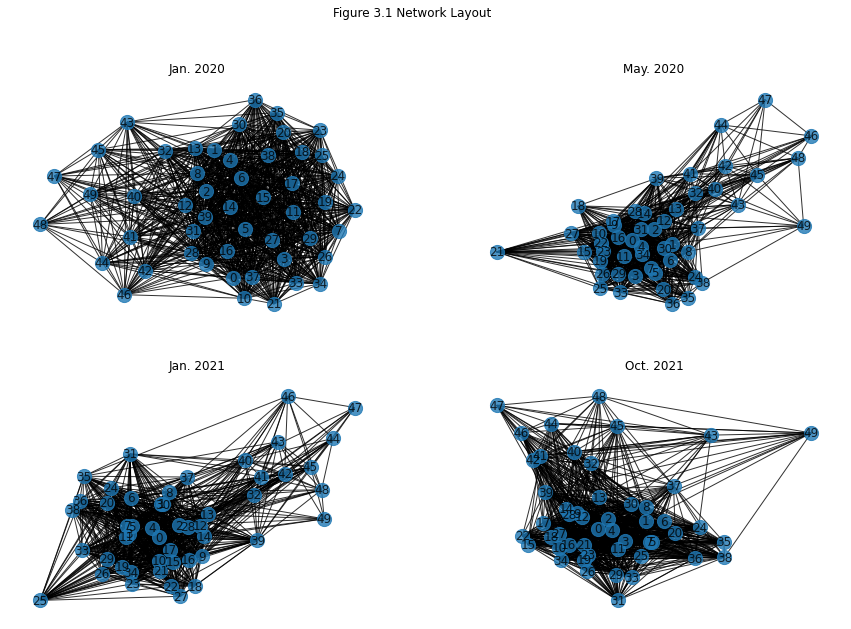

In [7]:
#%%Network layout 
fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot(2,2,1)
pos1 = nx.spring_layout(G1) 
nx.draw(G1, pos1, with_labels=True, alpha=0.8, node_size=200)
plt.title('Jan. 2020')

ax2 = plt.subplot(2,2,2)
pos2 = nx.spring_layout(G2)  
nx.draw(G2, pos2, with_labels=True, alpha=0.8, node_size=200)
plt.title('May. 2020')

ax3 = plt.subplot(2,2,3)
pos3 = nx.spring_layout(G3)
nx.draw(G3, pos3, with_labels=True, alpha=0.8, node_size=200)
plt.title('Jan. 2021')

ax4 = plt.subplot(2,2,4)
pos4 = nx.spring_layout(G4)
nx.draw(G4, pos4, with_labels=True, alpha=0.8, node_size=200)
plt.title('Oct. 2021')

plt.suptitle('Figure 3.1 Network Layout')
plt.show()

It could be observed in figure 3.1 that in the network of Jan. 2020, the clustering of the nodes is significant. With the pandemic in May.2020, the distribution of the nodes becomes relatively sparse, and the amount of edges is less. In Jan. 2021 and Oct. 2021, the networks are still more like May. 2020 one. However, a recovery trend to the Jan. 2020 one could be observed. The common specificity of the four networks is that the nodes with smaller numbers, which have more flights, are more clustered in the center approximately. 

### 2. Local network centrality indicators

In this subsection, the distribution of the local network centrality indicators for chosen months is shown.

####  Degree centrality

The degree centrality is the number of links that are directly connected to a node. The result is normalized by NetworkX in the range [0,1] and shown in figure 3.2 below.
It could be observed that firstly, the nodes with a high degree centrality(in the range [0.9,1] decreases a lot from Jan. 2020 to May. 2020. And then increases slightly in Jan. 2021 and Oct. 2021. 

Secondly, in Jan. 2020, the minimum degree centrality value is larger than 0.3, and in May. 2020, this value decreases to less than 0.2, and then slowly recovers to 0.3 in Oct. 2021.

These observations indicate that due to the pandemic, the number of links connecting different airports decreases, which means some flight routes are canceled, and the airports with more links before the pandemic are affected the most.

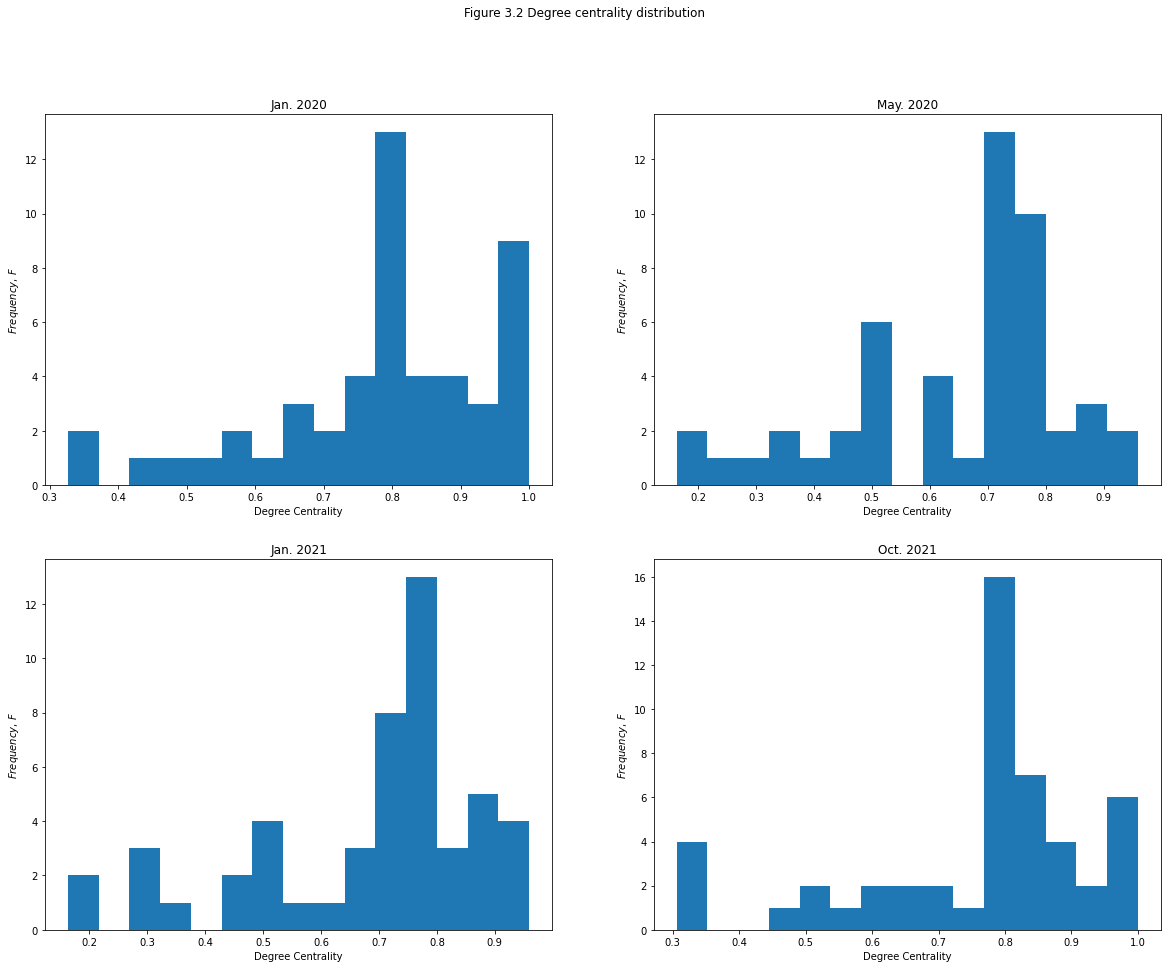

In [13]:
#degree_centrality
fig = plt.figure(figsize = (20,15))
ax1 = plt.subplot(2,2,1)
dc1 = nx.degree_centrality(G1)
plt.hist(dc1.values(), bins = 15)
plt.xlabel('Degree Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('Jan. 2020')

ax2 = plt.subplot(2,2,2)
dc2 = nx.degree_centrality(G2)
plt.hist(dc2.values(), bins = 15)
plt.xlabel('Degree Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('May. 2020')

ax3 = plt.subplot(2,2,3)
dc3 = nx.degree_centrality(G3)
plt.hist(dc3.values(), bins = 15)
plt.xlabel('Degree Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('Jan. 2021')

ax4 = plt.subplot(2,2,4)
dc4 = nx.degree_centrality(G4)
plt.hist(dc4.values(), bins = 15)
plt.xlabel('Degree Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('Oct. 2021')
plt.suptitle('Figure 3.2 Degree centrality distribution')
plt.show()

#### Betweenness centrality
The betweenness centrality is shown in figure 3.3 below. It is the number/share of shortest paths between node j and k that traverse node/link I by definition. 

The distribution of the value is mostly near 0. This could indicate that most airports are directly connected, so not many transfers are needed. During the pandemic, the maximum value of the betweenness centrality increases from 0.014 to more than 0.3, and it becomes lower again in 2021. This indicates that during the pandemic, many flight routes are canceled, and the flight routes between big airports are kept. So some direct links between airports disappear, and then transfers are needed, which will make the betweenness centrality of the big airports larger.

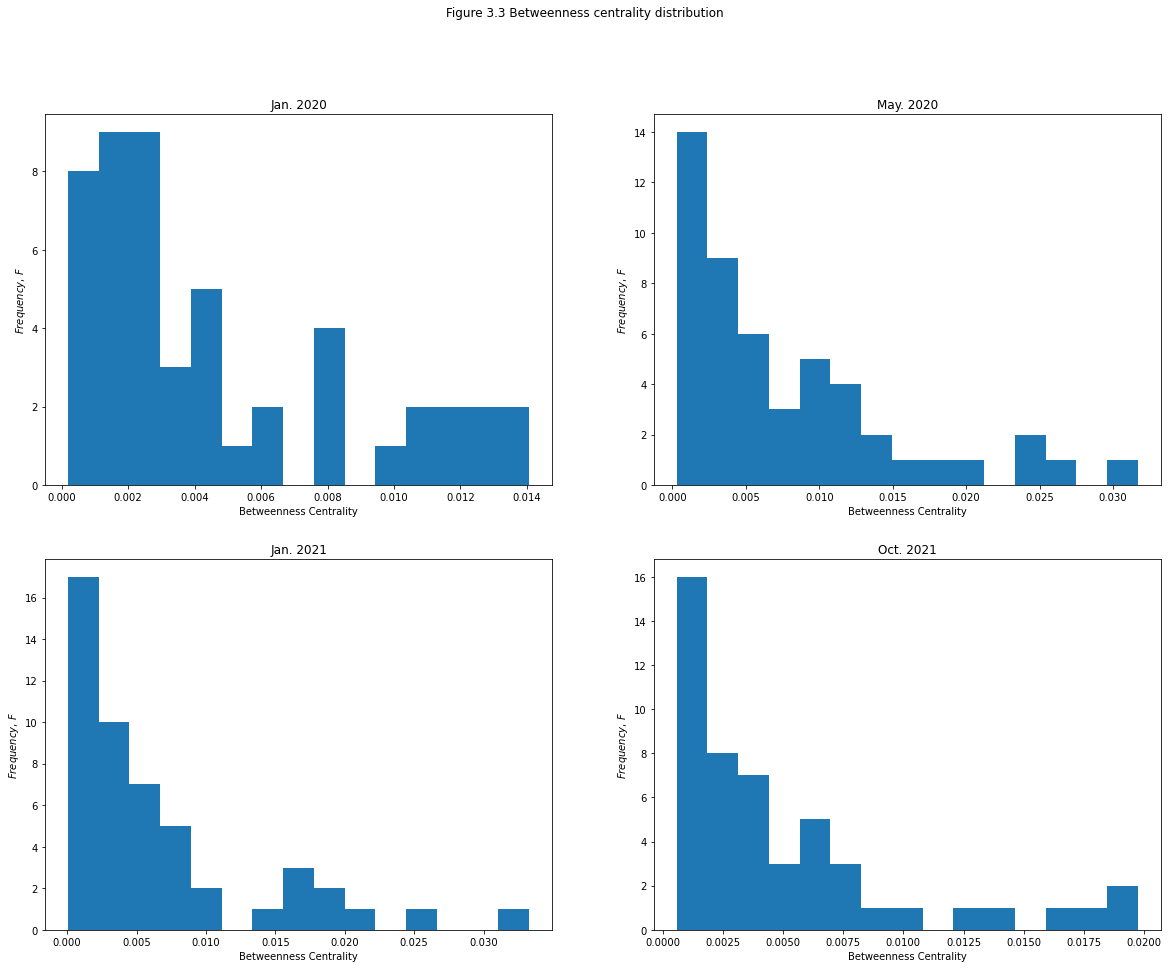

In [15]:
#%%betweenness_centrality
fig = plt.figure(figsize = (20,15))
ax1 = plt.subplot(2,2,1)
dc1 = nx.betweenness_centrality(G1)
plt.hist(dc1.values(), bins = 15)
plt.xlabel('Betweenness Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('Jan. 2020')
#plt.show()

ax2 = plt.subplot(2,2,2)
dc2 = nx.betweenness_centrality(G2)
plt.hist(dc2.values(), bins = 15)
plt.xlabel('Betweenness Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('May. 2020')

ax3 = plt.subplot(2,2,3)
dc3 = nx.betweenness_centrality(G3)
plt.hist(dc3.values(), bins = 15)
plt.xlabel('Betweenness Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('Jan. 2021')

ax4 = plt.subplot(2,2,4)
dc4 = nx.betweenness_centrality(G4)
plt.hist(dc4.values(), bins = 15)
plt.xlabel('Betweenness Centrality', fontsize = 10)
plt.ylabel('$Frequency, \, F$', fontsize = 10)
plt.title('Oct. 2021')
plt.suptitle('Figure 3.3 Betweenness centrality distribution')
plt.show()


#### Monthly trend of the average of the indicators

The monthly node centrality indicators of the network is computed and save in 'NetworkCentrality.csv'.

The figure 3.4 below shows the degree centrality and betweenness centrality of the global airport network from Oct.19 to Oct.21.


In [25]:
fig = px.line(df_nc , x="Month", y="Value", color="Indicator")
fig.update_xaxes(title={'text': 'Time'})
fig.update_yaxes(title={'text': 'Network Indicators Value'})
fig.update_layout(title="Figure 3.4 Monthly trend of the average of the indicators")
fig.show()

In [26]:
fig = px.line(df_bc , x="Month", y="Value", color="Indicator")
fig.update_xaxes(title={'text': 'Time'})
fig.update_yaxes(title={'text': 'Network Indicators Value'})
fig.update_layout(title="Figure 3.5 Monthly trend of the average of the betweenness centrality")
fig.show()

### 3. Conclusion